## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [05] : [Regresi dan Induksi Pohon Keputusan] </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-03-09 10:50:03.077282
Device ID: 	78f97259-be2d-11ed-8d87-088fc3234331



---

### Dataset yang dipakai:

1. [Cellphone] – sumber : [https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction]
2. [heart_v2] – sumber : [https://www.kaggle.com/datasets/girishkumar315/random-forest-classifier-heartdisease-dataset?select=heart_v2.csv]

### Hasil kerja

### Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#### Simple Linear Regression

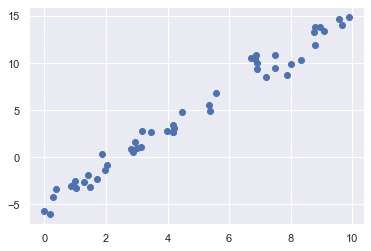

In [3]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x-5+rng.randn(50)
plt.scatter(x,y)

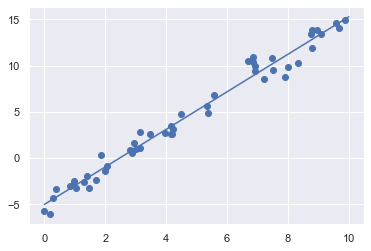

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [5]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  2.0272088103606944
Model intercept: -4.9985770855532


In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000138
[ 1.5 -2.   1. ]


### Basis Function Regression

#### Polynomial Basis Functions

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

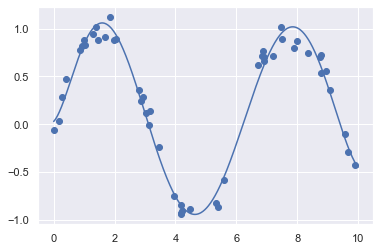

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Gaussian Basis Function

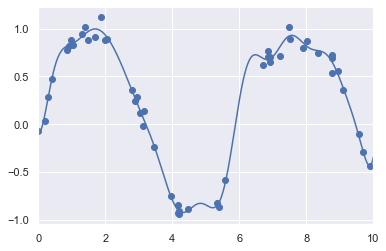

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

#### Regularization

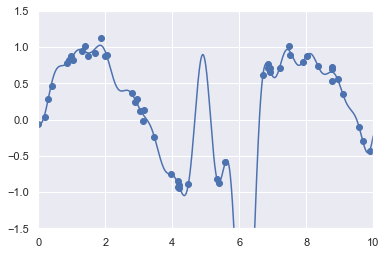

In [11]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

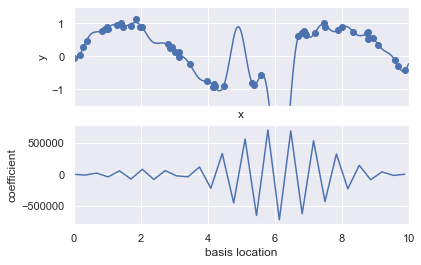

In [12]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#### Ridge regression ($L_2$ Regularization)

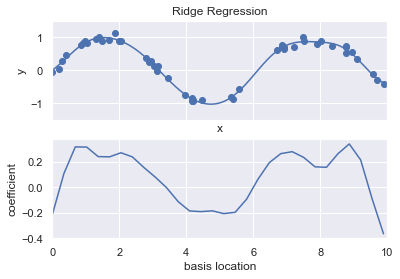

In [13]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

#### Lasso regression ($L_1$ regularization)

C:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


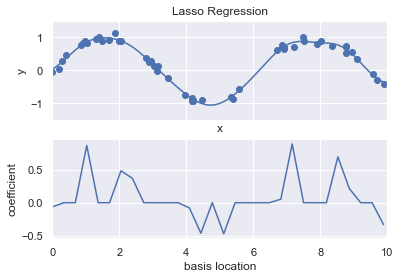

In [14]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

##### Linear Regression Example : Predicting Bicycle Traffic 

In [24]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [25]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [26]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [27]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

C:\Users\Rendy\AppData\Local\Temp\ipykernel_13372\2549717813.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

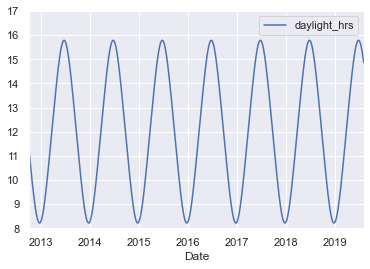

In [28]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [29]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [30]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [31]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [32]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

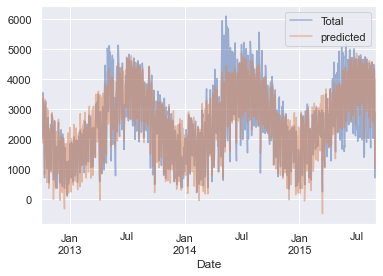

In [33]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [34]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

In [35]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [36]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


#### Applying Linear Regression to dataset: cellphone.csv

In [77]:
phone = pd.read_csv("cellphone.csv")
phone.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [78]:
# Check missing value
phone.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [81]:
# drop product_id
phone = phone.drop(['Product_id'], axis=1)
phone.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


#### Split dataset

In [96]:
X = phone.iloc[:, 1:]
y = phone.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [97]:
linReg = LinearRegression(fit_intercept=False)
linReg.fit(X, y)
phone["Predicted"] = linReg.predict(X)

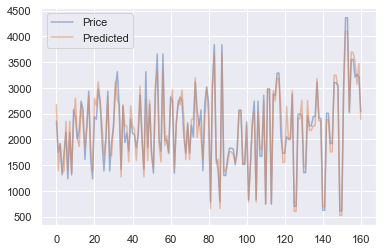

In [98]:
phone[["Price", "Predicted"]].plot(alpha=0.5);

In [102]:
X = phone[['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']]
params = pd.Series(model.coef_, index=X.columns)
params

Price            559.565649
Sale             621.403367
weight           652.760130
resoloution      479.087218
ppi              200.610186
cpu core       -1071.992402
cpu freq       -1164.513159
internal mem   -1240.709058
ram              126.432071
RearCam         -621.991651
Front_Cam        583.809992
battery           65.317205
thickness         19.024940
dtype: float64

In [103]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [104]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Price          560.0    0.0
Sale           621.0    0.0
weight         653.0    0.0
resoloution    479.0    0.0
ppi            201.0    0.0
cpu core     -1072.0    0.0
cpu freq     -1165.0    0.0
internal mem -1241.0    0.0
ram            126.0    0.0
RearCam       -622.0    0.0
Front_Cam      584.0    0.0
battery         65.0    0.0
thickness       19.0    0.0


### Decision Trees Learning

In [37]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

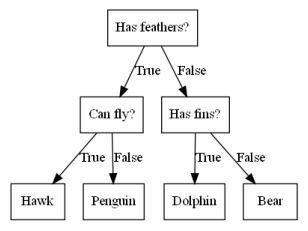

In [38]:
mglearn.plots.plot_animal_tree()

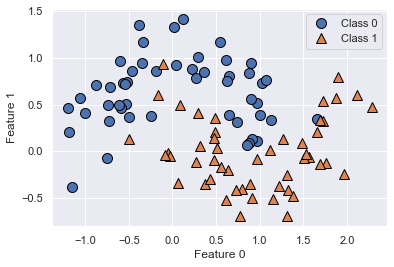

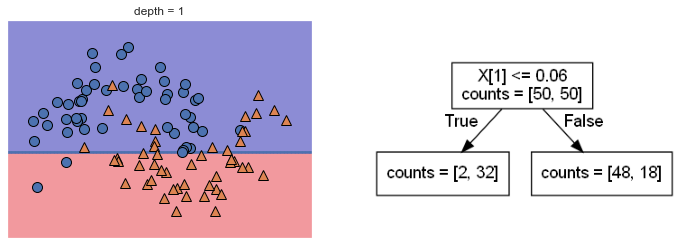

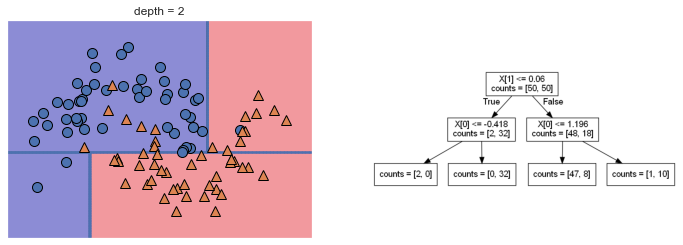

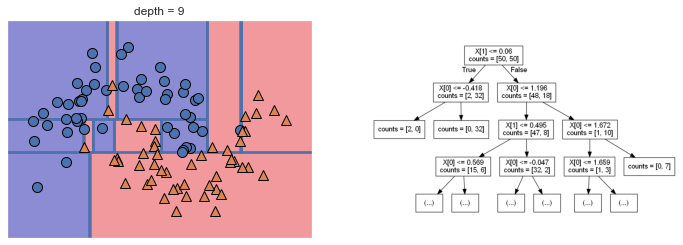

In [39]:
mglearn.plots.plot_tree_progressive()

#### Applying Decision Trees to dataset: heart_v2

In [57]:
heart_disease = pd.read_csv("heart_v2.csv")
heart_disease.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [58]:
# Check dataset information
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [59]:
# Check if there's missing value in the dataset
heart_disease.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

#### Split Dataset

In [60]:
X = heart_disease.iloc[:, :-1]
y = heart_disease.iloc[:, -1]

#### Controlling Complexity of Decision Trees

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.632


In [62]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.787
Accuracy on test set: 0.662


#### Analyzing Decision Trees

In [63]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                feature_names=X.columns, impurity=False, filled=True)

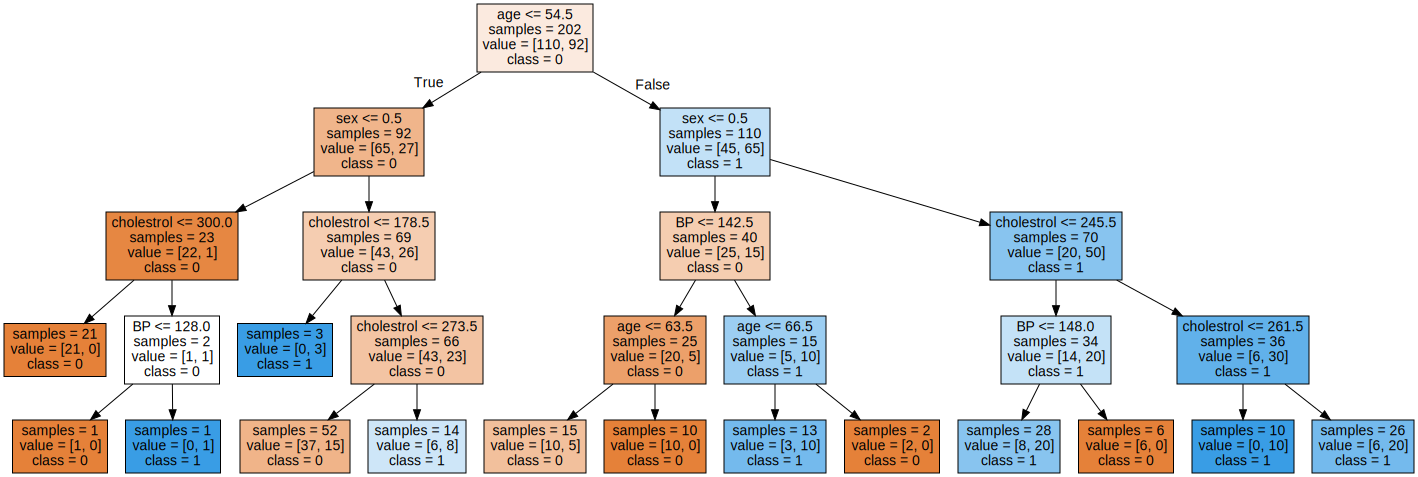

In [64]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Feature Importance in Trees

In [65]:
# Show the feature importances
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.30580835 0.24202039 0.2527967  0.19937455]


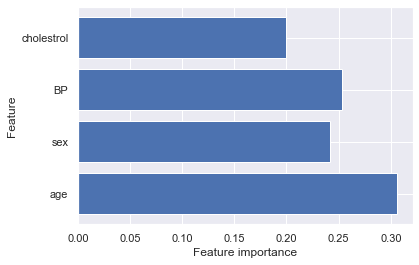

In [66]:
def plot_feature_importances_heartDisease(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_heartDisease(tree)

Feature importances: [0. 1.]


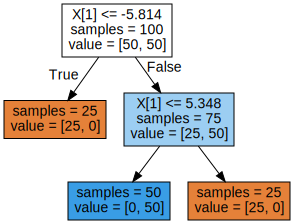

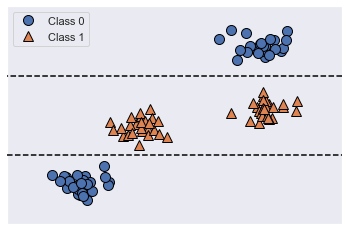

In [67]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

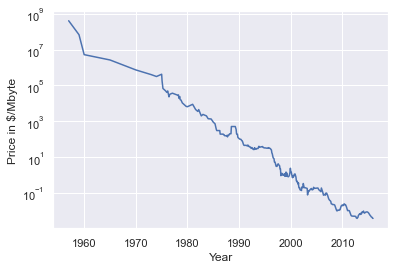

In [47]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [48]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


C:\Users\Rendy\AppData\Local\Temp\ipykernel_13372\2695514859.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\Rendy\AppData\Local\Temp\ipykernel_13372\2695514859.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = ram_prices.date[:, np.newaxis]


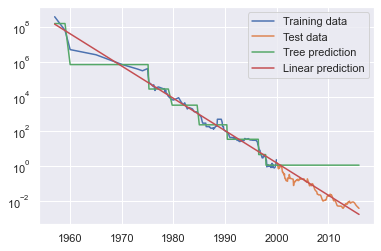

In [50]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

# Decision Tree
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

# Linear Regression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

X = ram_prices.date[:, np.newaxis]

# Prediction with both models
pred_tree = tree.predict(X)
pred_linReg = linReg.predict(X)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_linReg)

# Visualization
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

### Random Forests

#### Analyzing Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

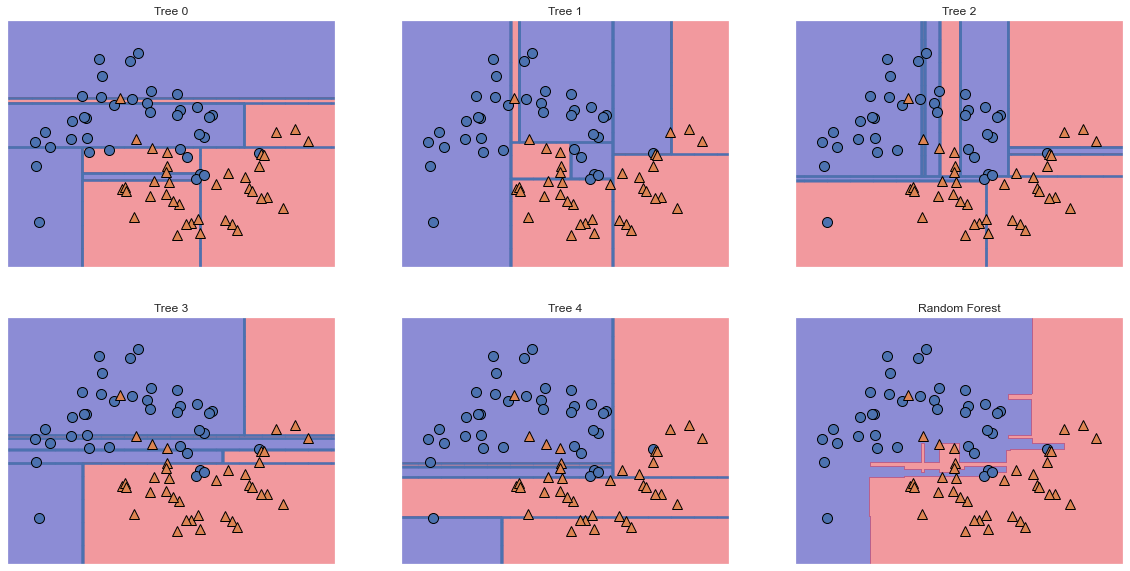

In [52]:
# Visualize the decision boundaries
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [55]:
heart_disease = pd.read_csv("heart_v2.csv")
heart_disease.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [56]:
X = heart_disease.iloc[:, :-1]
y = heart_disease.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.618


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Saya menggunakan 2 dataset, dataset 1 digunakan utk linear regression (prediksi price), dan dataset 2 untuk melakukan klasifikasi menggunakan Decision Tree dan Random Forest.
    - Dari lab minggu ini saya belajar cara menggabungkan 2 dataset kemudian melakukan model menggunakan ke2 dataset tersebut menggunakan linear regression. Saya juga belajar beberapa model lain seperti Random Forest, Decision Tree

In [106]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Rendy Wirawan Tamrin
NIM: 	00000053580
Time-stamp:	2023-03-15 23:49:39.119320


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [105]:
!jupyter nbconvert --to html "./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week05.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week05.ipynb to html
[NbConvertApp] Writing 1386430 bytes to IF540_KelasEL_00000053580_RendyWirawanTamrin_Week05.html
